In [1]:
# Imports
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel, VoigtModel, LinearModel, ConstantModel
import re
import numpy as np
from sklearn.linear_model import LinearRegression
from statistics import mean, median
from tqdm import tqdm

In [2]:
df = pd.read_csv('train_dataset_RAW.csv')

In [3]:
cr = df['Cr']
clean_df=df.T
clean_df.drop(clean_df.tail(8).index, inplace=True)
clean_df.index = clean_df.index.to_series().astype(str).str.replace('X','',regex=True).astype(float)
clean_df.index = clean_df.index.astype(float)

(13,)

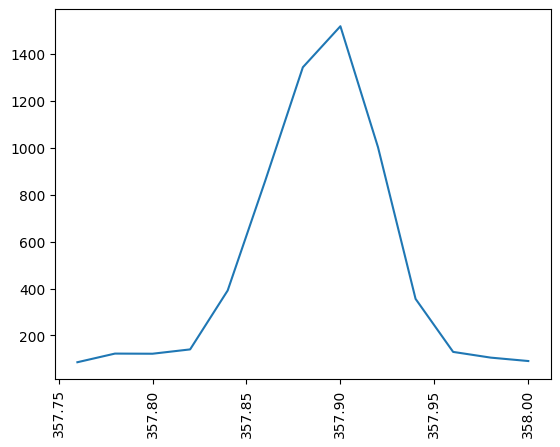

In [4]:
a = clean_df.loc[357.75:358,1000]
a.plot()
plt.xticks(rotation='vertical')
plt.legend().remove()
a.shape

In [5]:
model = VoigtModel()
peak_df = clean_df.loc[357.75:358,:]
intensity = np.zeros(max(cr.shape))

for col_id in tqdm(peak_df.columns):
    single_col_int = peak_df[col_id]
    single_col_wl = single_col_int.index.tolist()
    single_col_model = model.fit(single_col_int.values, x=single_col_wl)
    xx = np.linspace(single_col_wl[0], single_col_wl[-1], 100)
    fitted_single_col = single_col_model.eval(x=xx)
    intensity[col_id] = max(fitted_single_col)-min(fitted_single_col)
    
intensity

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2100/2100 [04:05<00:00,  8.54it/s]


array([1.04907704e+02, 1.30138525e+02, 2.49144048e+01, ...,
       5.19312776e-04, 6.44740451e-04, 6.15367007e+02])

In [6]:
# 
mean_int = np.repeat(np.mean(np.reshape(intensity, (42, 50)), axis=1), 50)
np.shape(mean_int), np.mean(intensity[0:50])

((2100,), 44.41922865715775)

In [7]:
lr = LinearRegression()
lr.fit(mean_int.reshape(-1,1), cr.values)
cr_pred = lr.predict(mean_int.reshape(-1,1))

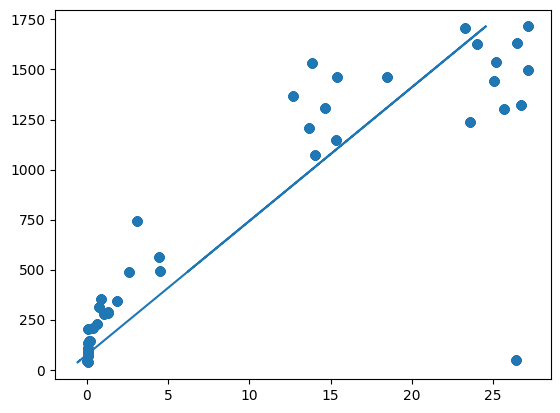

In [8]:
#plt.scatter(cr, intensity)
plt.scatter(cr, mean_int)
plt.plot(cr_pred, mean_int)

In [27]:
np.sqrt(np.average((cr_pred-cr)**2))
lr.score(mean_int.reshape(-1,1), cr.values)

0.7381464938542599

In [18]:
len(cr_pred-cr[1])

2100